### Logistic regression

#### the sigmoid function

- the ***sigmoid function*** is defined as: $f\left(x\right)=\frac{1}{1 +\,\exp{\left(-x\right)}}$


- the sigmoid function maps real values in the interval $(-\infty,\,+\infty)$ to the interval $\left(0, 1\right)$

    - $\text{for}\; x=-\infty\; \text{we have,}\; \exp{-\left(-\infty\right)}= \exp{\left(+\infty\right)}=\infty\,\Rightarrow f\left(-\infty\right)=\frac{1}{1 +\infty}=\frac{1}{\infty}=0$
    
    - $\text{for}; x=+\infty\; \text{we have,}\; \exp{-\left(+\infty\right)}= \exp{\left(-\infty\right)}=\frac{1}{\exp\left(+\infty\right)}=\frac{1}{\infty}=0\Rightarrow f\left(+\infty\right)=\frac{1}{1 +0}=1$
    
    
- with this mapping we can convert a numerical regression $x\in\left(-\infty, +\infty\right)$ into a probability $f\left(x\right)\in\left(0, 1\right)$

- therefore we can use logistic regression to solve a classification problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
x = np.linspace(-5, 5, 10000)

In [3]:
y = 1 /(1 + np.exp(-x))

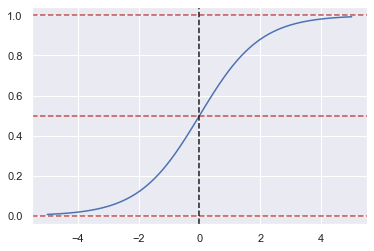

In [4]:
plt.plot(x, y)
plt.axhline(0, c = 'r', linestyle = '--')
plt.axhline(0.5, c = 'r', linestyle = '--')
plt.axhline(1, c = 'r', linestyle = '--')
plt.axvline(0, c = 'k', linestyle = '--')

#### example:
- predicting if a person would buy a life insurance based on his age

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('../../data/regression/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


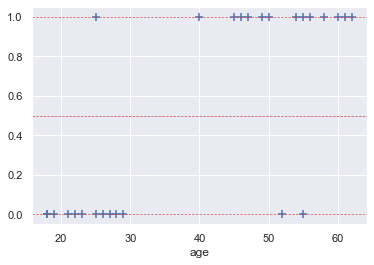

In [7]:
_, axs = plt.subplots(1, 1, figsize = (6, 4))
axs.scatter(df.age, df.bought_insurance, marker = '+', s = 50, color = 'b')
plt.axhline(0, c = 'r', linestyle = '--', linewidth = 0.7)
plt.axhline(0.5, c = 'r', linestyle = '--', linewidth = 0.7)
plt.axhline(1, c = 'r', linestyle = '--', linewidth = 0.7)
axs.set_xlabel('age');

#### build the model

- internally, the logistic regression performs two steps:

    - first, it builds a linear regression model like $y_{linear}=\beta_0+\beta_1\,x_{linear}$
    
    - second, it maps the result $y_{linear}$ into the interval $\left(0, 1\right)$ by making,
    
    $y_{logistic}=\frac{1}{1 +\exp\left(-y_{linear}\right)}=\frac{1}{1 +\exp{\left(-\left(\beta_0+\beta_1\,x_{linear}\right)\right)}}$

In [8]:
# independent variable
X = df.age.to_numpy().reshape(-1, 1)
# dependent variable
y = df.bought_insurance

In [9]:
model = LogisticRegression().fit(X, y)

In [10]:
# Coeficient
print('\u03B21: %.5f' % model.coef_)
# Intercept (x = 0)
print('\u03B20: %.5f' % model.intercept_)
# error
print('R^2:', model.score(X, y))

β1: 0.13547
β0: -5.26280
R^2: 0.8888888888888888


- now we can make predict the probability of bying a life inssurance for any value of age

In [11]:
model.predict(np.array([[65]]))

array([1])

- we can get a visualization of the model by making predictions for the whole range of the independent variable (age)

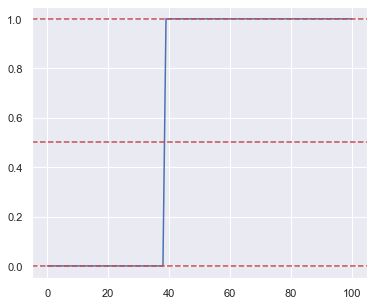

In [12]:
X = np.linspace(0, 100, 101).reshape(-1, 1)
Y = model.predict(X)
#
_, axs = plt.subplots(1, 1, figsize = (6, 5))
axs.plot(X, Y)
axs.axhline(0, c = 'r', linestyle = '--')
axs.axhline(0.5, c = 'r', linestyle = '--')
axs.axhline(1, c = 'r', linestyle = '--')

- the inflection point is the value of age at which the probability is 0.5

In [13]:
X = np.linspace(0, 100, 101).reshape(-1, 1)
Y = model.predict(X)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
# the probability changes abruptly from o to 1
# let's use higher precision to find the inflection point
X = np.linspace(0, 100, 10000).reshape(-1, 1)
Y = model.predict(X)
inflection = np.where(Y <= 0.5)[0][-1]
print('the inflection point is at age %5.2f for which the probability is %6.4f' %(X[inflection], Y[inflection]))

the inflection point is at age 38.84 for which the probability is 0.0000
